<a href="https://colab.research.google.com/github/mjohnsonperimeter/cosmology_2019/blob/master/SN_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install camb

     |████████████████████████████████| 32.0MB 122kB/s 
  Created wheel for camb: filename=camb-1.1.0-cp36-none-any.whl size=912758 sha256=2b9e0a44bd851ad724e888e65d8531b3a956db2cfa53bf3cb496c11281a3a72d
  Stored in directory: /root/.cache/pip/wheels/52/d0/76/aea0e7192efbc373eaec579a4d18909518a90a6cc10f07625b
Successfully built camb


In [2]:
import urllib
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import sys, platform, os
import camb

urllib.request.urlretrieve(url = "https://www.dropbox.com/s/js3vsjtbeirnd7y/SCPUnion2.1_mu_vs_z.txt?dl=1",filename = "SCPUnion2.1_mu_vs_z.txt")

('SCPUnion2.1_mu_vs_z.txt', <http.client.HTTPMessage at 0x7f50e4f31710>)

In [0]:
z_data=np.loadtxt(fname = 'SCPUnion2.1_mu_vs_z.txt',usecols=(1))
mag_data=np.loadtxt(fname = 'SCPUnion2.1_mu_vs_z.txt',usecols=(2))
error_data=np.loadtxt(fname = 'SCPUnion2.1_mu_vs_z.txt',usecols=(3))
error=error_data*mag_data

In [0]:
# Hubble constant in km/s/Mpc
H_0 = 67.5
# baryon and cdm fraction multiplied by h^2
omega_bh2 = 0.0224
omega_ch2 = 0.120
# Curvature
omega_k = 0.0
# Neutrino mass
nu_mass = 0.06

# Set within CAMB
pars = camb.CAMBparams()
pars.set_cosmology(H0=H_0, ombh2=omega_bh2, omch2=omega_ch2, mnu=nu_mass, omk=omega_k)
results = camb.get_background(pars)

z = np.linspace(0.01,1.5,100)
DL = results.luminosity_distance(z)
DL_lowz = ((2.99e5)/H_0)*z
dm = 5.*np.log10(DL/(1e-5))
dm_lowz = 5.*np.log10(DL_lowz/(1e-5))

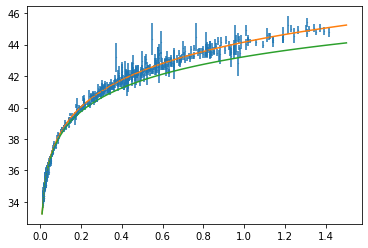

In [24]:
plt.errorbar(z_data,mag_data,error_data,fmt='o',ms=.25)
plt.plot(z,dm)
plt.plot(z,dm_lowz)